In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib
import os
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


In [2]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
pd.set_option("display.max_columns", None)
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,1,0,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,0,0,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,0,0,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,1,0,1,0,3,0,0,0,1,7,5,1


In [3]:
df.isnull().sum()*100/len(df)

Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

In [4]:
corrmat = df.corr(method = "spearman")
print(corrmat.round(2))

                      Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  \
Diabetes_012                  1.00    0.27      0.21       0.07  0.24    0.06   
HighBP                        0.27    1.00      0.30       0.10  0.24    0.10   
HighChol                      0.21    0.30      1.00       0.09  0.14    0.09   
CholCheck                     0.07    0.10      0.09       1.00  0.04   -0.01   
BMI                           0.24    0.24      0.14       0.04  1.00    0.02   
Smoker                        0.06    0.10      0.09      -0.01  0.02    1.00   
Stroke                        0.11    0.13      0.09       0.02  0.02    0.06   
HeartDiseaseorAttack          0.18    0.21      0.18       0.04  0.06    0.11   
PhysActivity                 -0.12   -0.13     -0.08       0.00 -0.14   -0.09   
Fruits                       -0.04   -0.04     -0.04       0.02 -0.10   -0.08   
Veggies                      -0.06   -0.06     -0.04       0.01 -0.07   -0.03   
HvyAlcoholConsump           

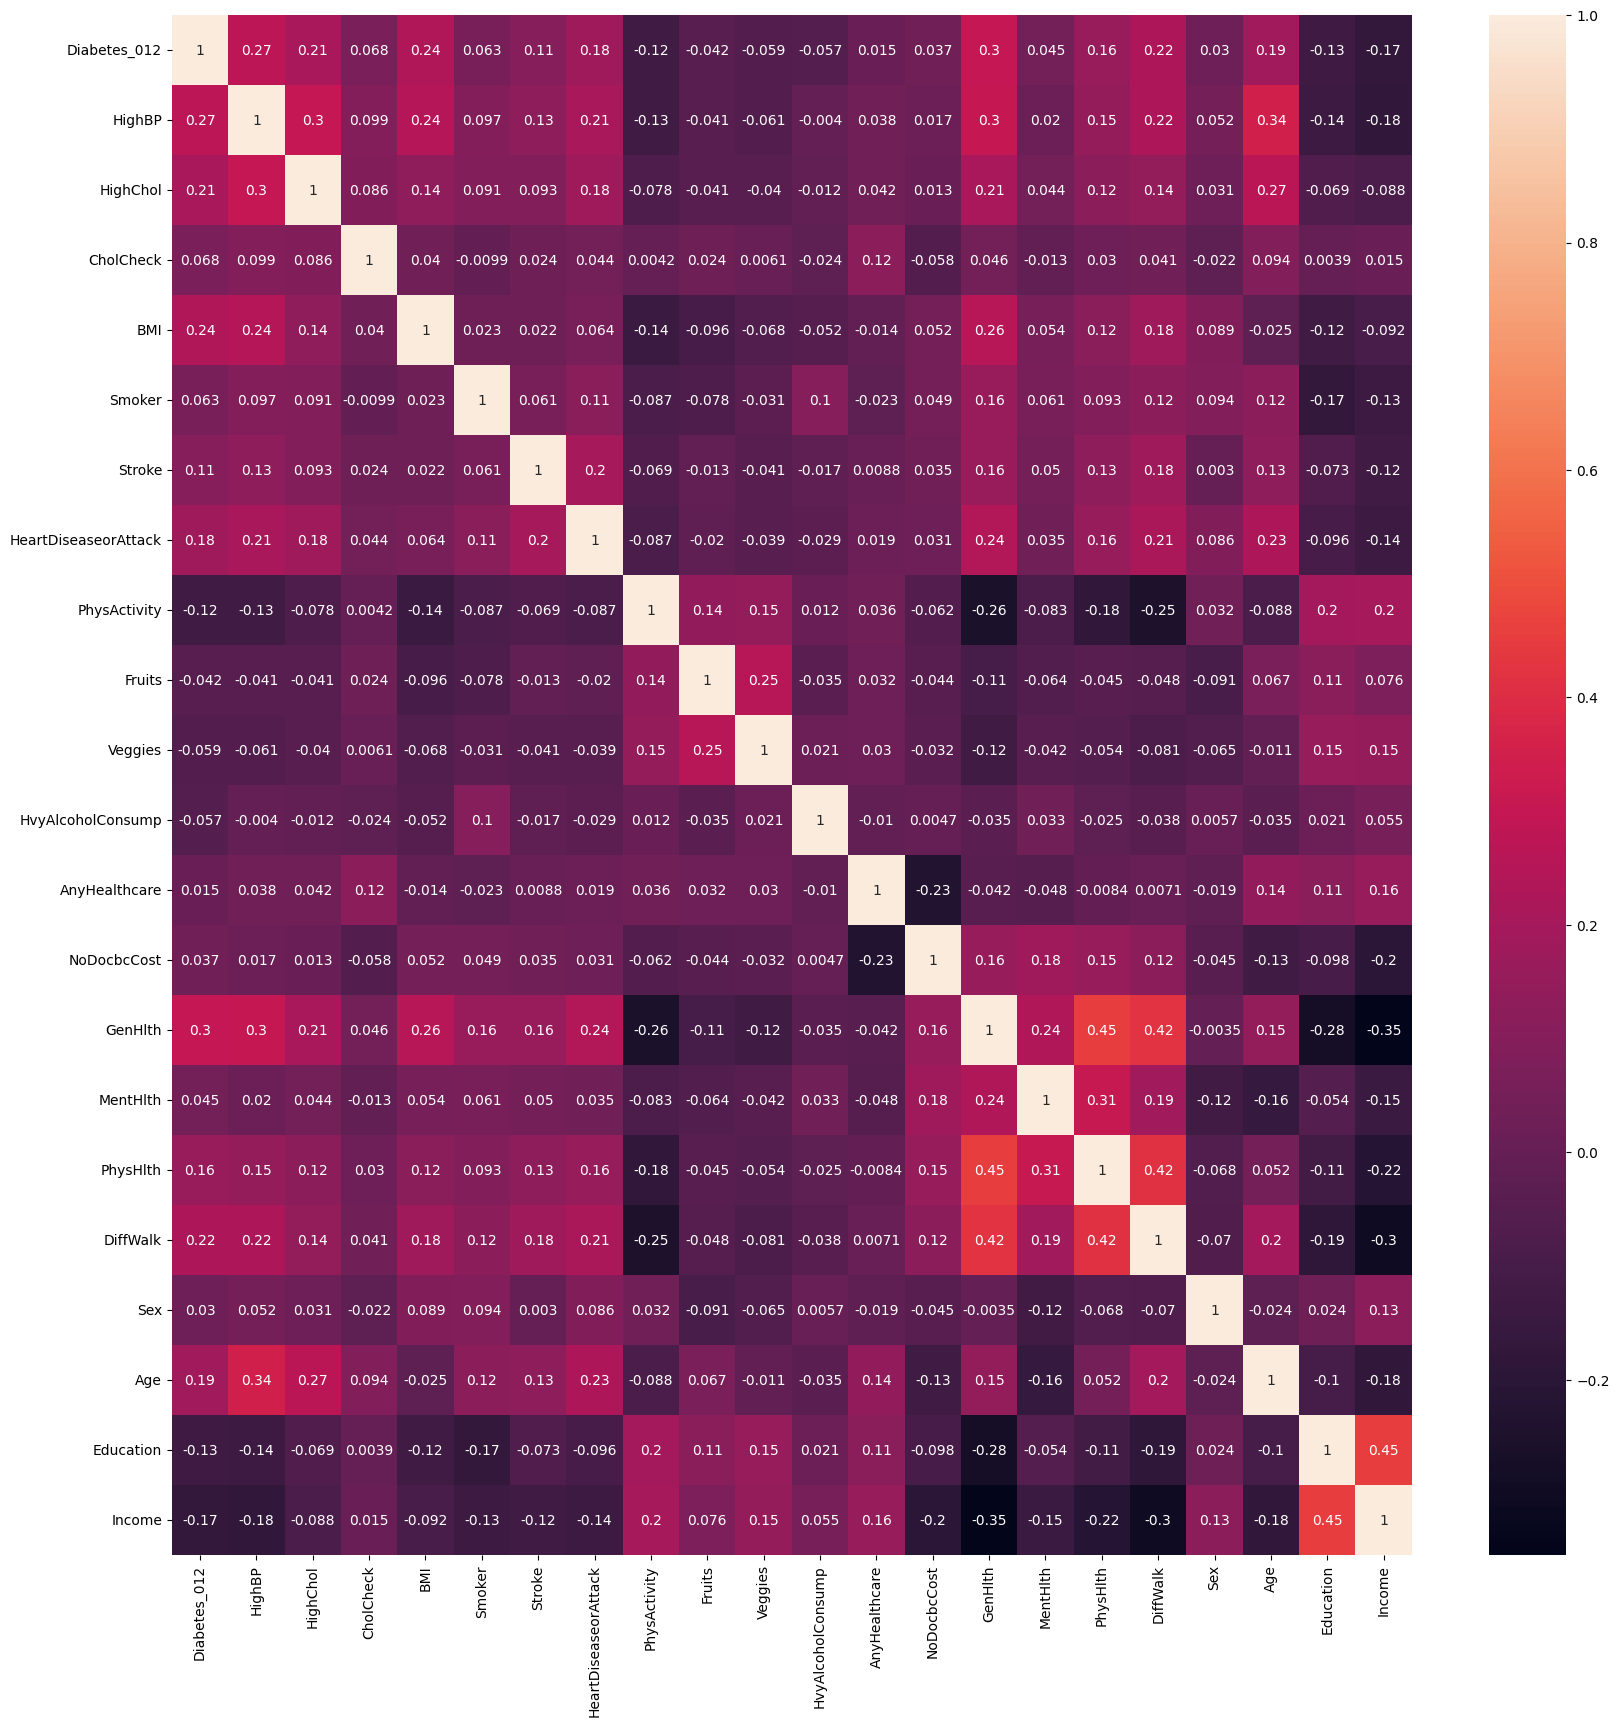

In [5]:
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

<Axes: xlabel='Diabetes_012', ylabel='count'>

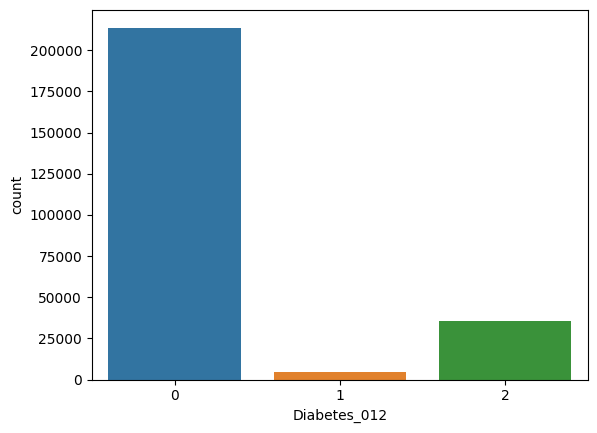

In [6]:
sns.countplot(df["Diabetes_012"])

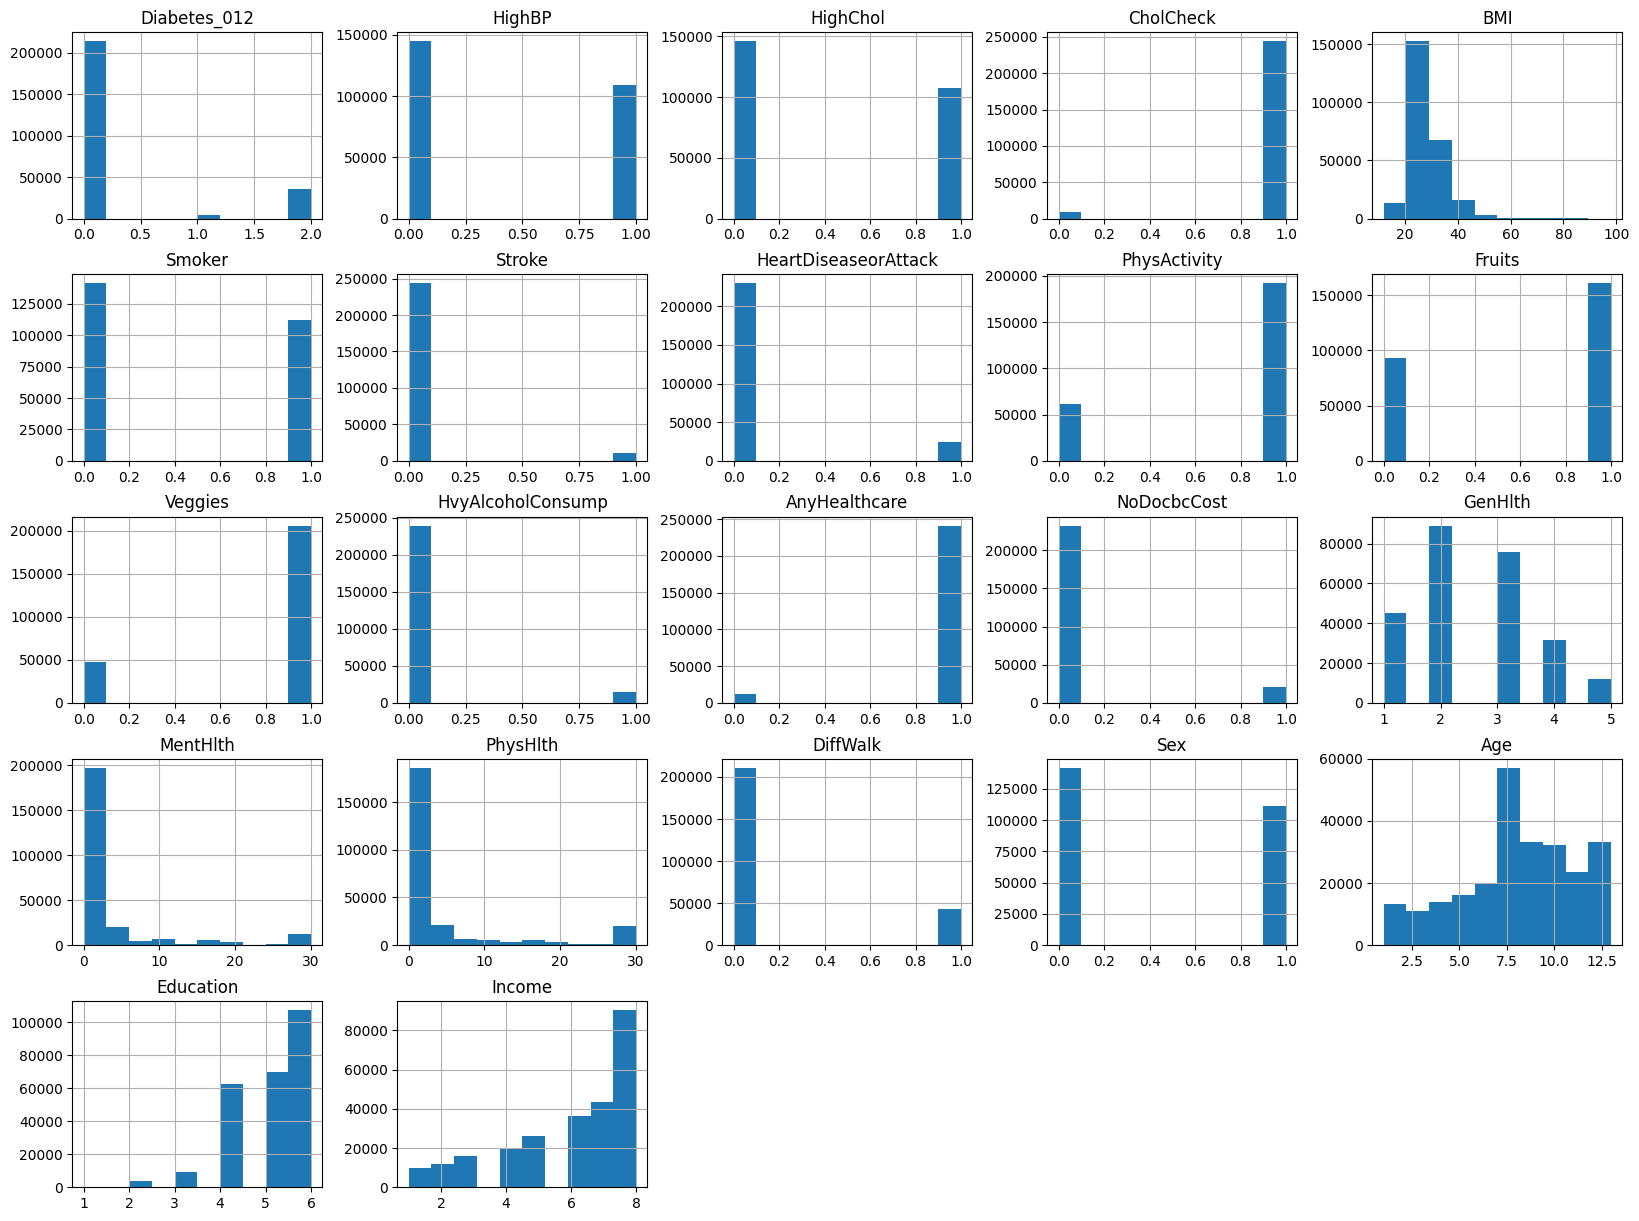

In [7]:
# Histogram for numeric variables
df.hist(figsize=(20, 15))
plt.show()



In [8]:
def datatypescheck(df):
    numerical_feature= [feature for feature in df.columns if df[feature].dtypes != 'O']
    discrete_feature=[feature for feature in numerical_feature if df[feature].dtypes == 'int64']
    continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
    categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
    print("Numerical Features Count {}".format(len(numerical_feature)))
    print("Discrete feature Count {}".format(len(discrete_feature)))
    print("Continuous feature Count {}".format(len(continuous_feature)))
    print("Categorical feature Count {}".format(len(categorical_feature)))
    print("Numerical features:",numerical_feature)
    print("discrete_features:",discrete_feature)
    print("continuous_features:",continuous_feature)
    print("categorical_features:",categorical_feature)
    return numerical_feature,discrete_feature,continuous_feature,categorical_feature

In [9]:
numerical_feature,discrete_feature,continuous_feature,categorical_feature=datatypescheck(df)

Numerical Features Count 22
Discrete feature Count 22
Continuous feature Count 0
Categorical feature Count 0
Numerical features: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
discrete_features: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
continuous_features: []
categorical_features: []


In [10]:
df.to_csv("preprocesseddiabitic.csv", index=False)

### Spliting data

In [11]:
X = df.drop(["Diabetes_012"], axis=1)
Y = df["Diabetes_012"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

### Traget class sampling

In [31]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 170962, 2: 28277, 1: 3705})
The number of classes after fit Counter({0: 170962, 2: 170962, 1: 170962})


In [14]:
accuracylis=[]


### Catboostclassfier

In [15]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.060557
0:	total: 280ms	remaining: 9m 19s
1:	total: 372ms	remaining: 6m 11s
2:	total: 457ms	remaining: 5m 4s
3:	total: 551ms	remaining: 4m 35s
4:	total: 636ms	remaining: 4m 13s
5:	total: 721ms	remaining: 3m 59s
6:	total: 813ms	remaining: 3m 51s
7:	total: 896ms	remaining: 3m 43s
8:	total: 980ms	remaining: 3m 36s
9:	total: 1.06s	remaining: 3m 32s
10:	total: 1.14s	remaining: 3m 26s
11:	total: 1.23s	remaining: 3m 23s
12:	total: 1.31s	remaining: 3m 19s
13:	total: 1.39s	remaining: 3m 16s
14:	total: 1.47s	remaining: 3m 13s
15:	total: 1.54s	remaining: 3m 11s
16:	total: 1.63s	remaining: 3m 9s
17:	total: 1.7s	remaining: 3m 7s
18:	total: 1.78s	remaining: 3m 5s
19:	total: 1.85s	remaining: 3m 3s
20:	total: 1.92s	remaining: 3m 1s
21:	total: 2s	remaining: 2m 59s
22:	total: 2.08s	remaining: 2m 59s
23:	total: 2.15s	remaining: 2m 57s
24:	total: 2.23s	remaining: 2m 56s
25:	total: 2.3s	remaining: 2m 54s
26:	total: 2.39s	remaining: 2m 54s
27:	total: 2.47s	remaining: 2m 53s
28:	total: 

233:	total: 18.9s	remaining: 2m 22s
234:	total: 19s	remaining: 2m 22s
235:	total: 19s	remaining: 2m 22s
236:	total: 19.2s	remaining: 2m 22s
237:	total: 19.2s	remaining: 2m 22s
238:	total: 19.4s	remaining: 2m 22s
239:	total: 19.4s	remaining: 2m 22s
240:	total: 19.5s	remaining: 2m 22s
241:	total: 19.6s	remaining: 2m 22s
242:	total: 19.7s	remaining: 2m 22s
243:	total: 19.8s	remaining: 2m 22s
244:	total: 19.9s	remaining: 2m 22s
245:	total: 20s	remaining: 2m 22s
246:	total: 20s	remaining: 2m 22s
247:	total: 20.1s	remaining: 2m 22s
248:	total: 20.2s	remaining: 2m 22s
249:	total: 20.3s	remaining: 2m 22s
250:	total: 20.4s	remaining: 2m 22s
251:	total: 20.5s	remaining: 2m 22s
252:	total: 20.6s	remaining: 2m 21s
253:	total: 20.6s	remaining: 2m 21s
254:	total: 20.7s	remaining: 2m 21s
255:	total: 20.8s	remaining: 2m 21s
256:	total: 20.9s	remaining: 2m 21s
257:	total: 21s	remaining: 2m 21s
258:	total: 21.1s	remaining: 2m 21s
259:	total: 21.2s	remaining: 2m 21s
260:	total: 21.2s	remaining: 2m 21s
26

464:	total: 38.9s	remaining: 2m 8s
465:	total: 38.9s	remaining: 2m 8s
466:	total: 39s	remaining: 2m 8s
467:	total: 39.1s	remaining: 2m 8s
468:	total: 39.2s	remaining: 2m 8s
469:	total: 39.3s	remaining: 2m 7s
470:	total: 39.4s	remaining: 2m 7s
471:	total: 39.5s	remaining: 2m 7s
472:	total: 39.6s	remaining: 2m 7s
473:	total: 39.6s	remaining: 2m 7s
474:	total: 39.7s	remaining: 2m 7s
475:	total: 39.8s	remaining: 2m 7s
476:	total: 39.9s	remaining: 2m 7s
477:	total: 40s	remaining: 2m 7s
478:	total: 40.1s	remaining: 2m 7s
479:	total: 40.1s	remaining: 2m 7s
480:	total: 40.2s	remaining: 2m 7s
481:	total: 40.3s	remaining: 2m 6s
482:	total: 40.4s	remaining: 2m 6s
483:	total: 40.5s	remaining: 2m 6s
484:	total: 40.6s	remaining: 2m 6s
485:	total: 40.7s	remaining: 2m 6s
486:	total: 40.8s	remaining: 2m 6s
487:	total: 40.9s	remaining: 2m 6s
488:	total: 40.9s	remaining: 2m 6s
489:	total: 41s	remaining: 2m 6s
490:	total: 41.1s	remaining: 2m 6s
491:	total: 41.2s	remaining: 2m 6s
492:	total: 41.3s	remainin

700:	total: 59.4s	remaining: 1m 50s
701:	total: 59.4s	remaining: 1m 49s
702:	total: 59.5s	remaining: 1m 49s
703:	total: 59.6s	remaining: 1m 49s
704:	total: 59.7s	remaining: 1m 49s
705:	total: 59.8s	remaining: 1m 49s
706:	total: 59.9s	remaining: 1m 49s
707:	total: 60s	remaining: 1m 49s
708:	total: 1m	remaining: 1m 49s
709:	total: 1m	remaining: 1m 49s
710:	total: 1m	remaining: 1m 49s
711:	total: 1m	remaining: 1m 49s
712:	total: 1m	remaining: 1m 49s
713:	total: 1m	remaining: 1m 48s
714:	total: 1m	remaining: 1m 48s
715:	total: 1m	remaining: 1m 48s
716:	total: 1m	remaining: 1m 48s
717:	total: 1m	remaining: 1m 48s
718:	total: 1m	remaining: 1m 48s
719:	total: 1m 1s	remaining: 1m 48s
720:	total: 1m 1s	remaining: 1m 48s
721:	total: 1m 1s	remaining: 1m 48s
722:	total: 1m 1s	remaining: 1m 48s
723:	total: 1m 1s	remaining: 1m 48s
724:	total: 1m 1s	remaining: 1m 48s
725:	total: 1m 1s	remaining: 1m 48s
726:	total: 1m 1s	remaining: 1m 48s
727:	total: 1m 1s	remaining: 1m 47s
728:	total: 1m 1s	remaining

926:	total: 1m 19s	remaining: 1m 31s
927:	total: 1m 19s	remaining: 1m 31s
928:	total: 1m 19s	remaining: 1m 31s
929:	total: 1m 19s	remaining: 1m 31s
930:	total: 1m 19s	remaining: 1m 31s
931:	total: 1m 19s	remaining: 1m 31s
932:	total: 1m 19s	remaining: 1m 31s
933:	total: 1m 19s	remaining: 1m 31s
934:	total: 1m 19s	remaining: 1m 31s
935:	total: 1m 20s	remaining: 1m 30s
936:	total: 1m 20s	remaining: 1m 30s
937:	total: 1m 20s	remaining: 1m 30s
938:	total: 1m 20s	remaining: 1m 30s
939:	total: 1m 20s	remaining: 1m 30s
940:	total: 1m 20s	remaining: 1m 30s
941:	total: 1m 20s	remaining: 1m 30s
942:	total: 1m 20s	remaining: 1m 30s
943:	total: 1m 20s	remaining: 1m 30s
944:	total: 1m 20s	remaining: 1m 30s
945:	total: 1m 21s	remaining: 1m 30s
946:	total: 1m 21s	remaining: 1m 30s
947:	total: 1m 21s	remaining: 1m 30s
948:	total: 1m 21s	remaining: 1m 30s
949:	total: 1m 21s	remaining: 1m 30s
950:	total: 1m 21s	remaining: 1m 29s
951:	total: 1m 21s	remaining: 1m 29s
952:	total: 1m 21s	remaining: 1m 29s
9

1146:	total: 1m 38s	remaining: 1m 13s
1147:	total: 1m 39s	remaining: 1m 13s
1148:	total: 1m 39s	remaining: 1m 13s
1149:	total: 1m 39s	remaining: 1m 13s
1150:	total: 1m 39s	remaining: 1m 13s
1151:	total: 1m 39s	remaining: 1m 13s
1152:	total: 1m 39s	remaining: 1m 13s
1153:	total: 1m 39s	remaining: 1m 12s
1154:	total: 1m 39s	remaining: 1m 12s
1155:	total: 1m 39s	remaining: 1m 12s
1156:	total: 1m 39s	remaining: 1m 12s
1157:	total: 1m 39s	remaining: 1m 12s
1158:	total: 1m 39s	remaining: 1m 12s
1159:	total: 1m 40s	remaining: 1m 12s
1160:	total: 1m 40s	remaining: 1m 12s
1161:	total: 1m 40s	remaining: 1m 12s
1162:	total: 1m 40s	remaining: 1m 12s
1163:	total: 1m 40s	remaining: 1m 12s
1164:	total: 1m 40s	remaining: 1m 11s
1165:	total: 1m 40s	remaining: 1m 11s
1166:	total: 1m 40s	remaining: 1m 11s
1167:	total: 1m 40s	remaining: 1m 11s
1168:	total: 1m 40s	remaining: 1m 11s
1169:	total: 1m 40s	remaining: 1m 11s
1170:	total: 1m 40s	remaining: 1m 11s
1171:	total: 1m 41s	remaining: 1m 11s
1172:	total:

1368:	total: 1m 57s	remaining: 54.1s
1369:	total: 1m 57s	remaining: 54s
1370:	total: 1m 57s	remaining: 53.9s
1371:	total: 1m 57s	remaining: 53.8s
1372:	total: 1m 57s	remaining: 53.7s
1373:	total: 1m 57s	remaining: 53.7s
1374:	total: 1m 57s	remaining: 53.6s
1375:	total: 1m 57s	remaining: 53.5s
1376:	total: 1m 58s	remaining: 53.4s
1377:	total: 1m 58s	remaining: 53.3s
1378:	total: 1m 58s	remaining: 53.2s
1379:	total: 1m 58s	remaining: 53.1s
1380:	total: 1m 58s	remaining: 53s
1381:	total: 1m 58s	remaining: 53s
1382:	total: 1m 58s	remaining: 52.9s
1383:	total: 1m 58s	remaining: 52.8s
1384:	total: 1m 58s	remaining: 52.7s
1385:	total: 1m 58s	remaining: 52.6s
1386:	total: 1m 58s	remaining: 52.5s
1387:	total: 1m 58s	remaining: 52.4s
1388:	total: 1m 59s	remaining: 52.4s
1389:	total: 1m 59s	remaining: 52.3s
1390:	total: 1m 59s	remaining: 52.2s
1391:	total: 1m 59s	remaining: 52.1s
1392:	total: 1m 59s	remaining: 52s
1393:	total: 1m 59s	remaining: 51.9s
1394:	total: 1m 59s	remaining: 51.8s
1395:	tot

1596:	total: 2m 16s	remaining: 34.4s
1597:	total: 2m 16s	remaining: 34.3s
1598:	total: 2m 16s	remaining: 34.2s
1599:	total: 2m 16s	remaining: 34.1s
1600:	total: 2m 16s	remaining: 34s
1601:	total: 2m 16s	remaining: 33.9s
1602:	total: 2m 16s	remaining: 33.8s
1603:	total: 2m 16s	remaining: 33.8s
1604:	total: 2m 16s	remaining: 33.7s
1605:	total: 2m 16s	remaining: 33.6s
1606:	total: 2m 16s	remaining: 33.5s
1607:	total: 2m 17s	remaining: 33.4s
1608:	total: 2m 17s	remaining: 33.3s
1609:	total: 2m 17s	remaining: 33.2s
1610:	total: 2m 17s	remaining: 33.2s
1611:	total: 2m 17s	remaining: 33.1s
1612:	total: 2m 17s	remaining: 33s
1613:	total: 2m 17s	remaining: 32.9s
1614:	total: 2m 17s	remaining: 32.8s
1615:	total: 2m 17s	remaining: 32.7s
1616:	total: 2m 17s	remaining: 32.6s
1617:	total: 2m 17s	remaining: 32.6s
1618:	total: 2m 17s	remaining: 32.5s
1619:	total: 2m 18s	remaining: 32.4s
1620:	total: 2m 18s	remaining: 32.3s
1621:	total: 2m 18s	remaining: 32.2s
1622:	total: 2m 18s	remaining: 32.1s
1623:

1821:	total: 2m 34s	remaining: 15.1s
1822:	total: 2m 35s	remaining: 15.1s
1823:	total: 2m 35s	remaining: 15s
1824:	total: 2m 35s	remaining: 14.9s
1825:	total: 2m 35s	remaining: 14.8s
1826:	total: 2m 35s	remaining: 14.7s
1827:	total: 2m 35s	remaining: 14.6s
1828:	total: 2m 35s	remaining: 14.5s
1829:	total: 2m 35s	remaining: 14.5s
1830:	total: 2m 35s	remaining: 14.4s
1831:	total: 2m 35s	remaining: 14.3s
1832:	total: 2m 35s	remaining: 14.2s
1833:	total: 2m 35s	remaining: 14.1s
1834:	total: 2m 36s	remaining: 14s
1835:	total: 2m 36s	remaining: 13.9s
1836:	total: 2m 36s	remaining: 13.9s
1837:	total: 2m 36s	remaining: 13.8s
1838:	total: 2m 36s	remaining: 13.7s
1839:	total: 2m 36s	remaining: 13.6s
1840:	total: 2m 36s	remaining: 13.5s
1841:	total: 2m 36s	remaining: 13.4s
1842:	total: 2m 36s	remaining: 13.3s
1843:	total: 2m 36s	remaining: 13.3s
1844:	total: 2m 36s	remaining: 13.2s
1845:	total: 2m 36s	remaining: 13.1s
1846:	total: 2m 37s	remaining: 13s
1847:	total: 2m 37s	remaining: 12.9s
1848:	t

In [16]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
accuracylis.append(accuracy_score(y_test,y_pred))

[[28773  5503  8465]
 [  369   123   434]
 [ 2098   760  4211]]
0.6525346893724377
              precision    recall  f1-score   support

           0       0.92      0.67      0.78     42741
           1       0.02      0.13      0.03       926
           2       0.32      0.60      0.42      7069

    accuracy                           0.65     50736
   macro avg       0.42      0.47      0.41     50736
weighted avg       0.82      0.65      0.71     50736



### Randomforest 

In [17]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [18]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
accuracylis.append(accuracy_score(y_test,y_pred1))

[[34811   846  7084]
 [  571    14   341]
 [ 3472   109  3488]]
0.7551442762535477
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     42741
           1       0.01      0.02      0.01       926
           2       0.32      0.49      0.39      7069

    accuracy                           0.76     50736
   macro avg       0.41      0.44      0.42     50736
weighted avg       0.80      0.76      0.77     50736



### Logisticregression

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
accuracylis.append(accuracy_score(y_test,y_pred2))

[[28477  7119  7145]
 [  383   180   363]
 [ 2203  1060  3806]]
0.6398415326395459
              precision    recall  f1-score   support

           0       0.92      0.67      0.77     42741
           1       0.02      0.19      0.04       926
           2       0.34      0.54      0.41      7069

    accuracy                           0.64     50736
   macro avg       0.42      0.47      0.41     50736
weighted avg       0.82      0.64      0.71     50736



### GaussianNB

In [21]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [22]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
accuracylis.append(accuracy_score(y_test,y_pred3))

[[16413 19598  6730]
 [  174   400   352]
 [  789  2748  3532]]
0.4009973194575844
              precision    recall  f1-score   support

           0       0.94      0.38      0.55     42741
           1       0.02      0.43      0.03       926
           2       0.33      0.50      0.40      7069

    accuracy                           0.40     50736
   macro avg       0.43      0.44      0.33     50736
weighted avg       0.84      0.40      0.52     50736



### KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [24]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
accuracylis.append(accuracy_score(y_test,y_pred4))

[[33584  2356  6801]
 [  565    88   273]
 [ 3798   579  2692]]
0.7167297382529171
              precision    recall  f1-score   support

           0       0.89      0.79      0.83     42741
           1       0.03      0.10      0.04       926
           2       0.28      0.38      0.32      7069

    accuracy                           0.72     50736
   macro avg       0.40      0.42      0.40     50736
weighted avg       0.78      0.72      0.75     50736



### XGBClassifier

In [25]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))
accuracylis.append(accuracy_score(y_test,y_pred6))

[[28204  6282  8255]
 [  360   152   414]
 [ 2042   828  4199]]
0.6416548407442447
              precision    recall  f1-score   support

           0       0.92      0.66      0.77     42741
           1       0.02      0.16      0.04       926
           2       0.33      0.59      0.42      7069

    accuracy                           0.64     50736
   macro avg       0.42      0.47      0.41     50736
weighted avg       0.82      0.64      0.71     50736



### Feed forward Neural Network

In [27]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple feedforward neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test_scaled, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")
accuracylis.append(accuracy)

Epoch 1/10
6342/6342 [==============================] - 9s 1ms/step - loss: 0.2050 - accuracy: 0.7175 - val_loss: -0.3477 - val_accuracy: 0.7590
Epoch 2/10
6342/6342 [==============================] - 10s 2ms/step - loss: -2.9768 - accuracy: 0.7201 - val_loss: -8.0353 - val_accuracy: 0.7294
Epoch 3/10
6342/6342 [==============================] - 8s 1ms/step - loss: -15.9127 - accuracy: 0.7237 - val_loss: -29.2439 - val_accuracy: 0.7202
Epoch 4/10
6342/6342 [==============================] - 8s 1ms/step - loss: -44.8767 - accuracy: 0.7169 - val_loss: -70.8426 - val_accuracy: 0.7289
Epoch 5/10
6342/6342 [==============================] - 9s 1ms/step - loss: -99.2530 - accuracy: 0.7140 - val_loss: -143.8345 - val_accuracy: 0.7082
Epoch 6/10
6342/6342 [==============================] - 9s 1ms/step - loss: -183.8080 - accuracy: 0.7142 - val_loss: -249.8609 - val_accuracy: 0.7330
Epoch 7/10
6342/6342 [==============================] - 9s 1ms/step - loss: -305.8332 - accuracy: 0.7159 - val_lo

### 1D CNN

In [28]:
# Reshape data to have a single channel (assuming you have 1D data)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build a simple 1D CNN
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test_reshaped, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")
accuracylis.append(accuracy)

Epoch 1/10
6342/6342 [==============================] - 17s 3ms/step - loss: 0.2565 - accuracy: 0.7044 - val_loss: -0.1433 - val_accuracy: 0.6706
Epoch 2/10
6342/6342 [==============================] - 19s 3ms/step - loss: -3.2492 - accuracy: 0.7061 - val_loss: -8.9782 - val_accuracy: 0.6745
Epoch 3/10
6342/6342 [==============================] - 19s 3ms/step - loss: -18.4883 - accuracy: 0.7271 - val_loss: -33.1184 - val_accuracy: 0.7573
Epoch 4/10
6342/6342 [==============================] - 18s 3ms/step - loss: -52.6933 - accuracy: 0.7172 - val_loss: -82.0576 - val_accuracy: 0.7174
Epoch 5/10
6342/6342 [==============================] - 18s 3ms/step - loss: -116.5775 - accuracy: 0.7117 - val_loss: -171.1597 - val_accuracy: 0.6896
Epoch 6/10
6342/6342 [==============================] - 19s 3ms/step - loss: -213.9686 - accuracy: 0.7106 - val_loss: -294.7218 - val_accuracy: 0.7161
Epoch 7/10
6342/6342 [==============================] - 13s 2ms/step - loss: -352.2521 - accuracy: 0.7111 -

### comparing models

In [29]:
accuracylis

[0.6525346893724377,
 0.7551442762535477,
 0.6398415326395459,
 0.4009973194575844,
 0.7167297382529171,
 0.6416548407442447,
 0.7626143097877502,
 0.7170450687408447]

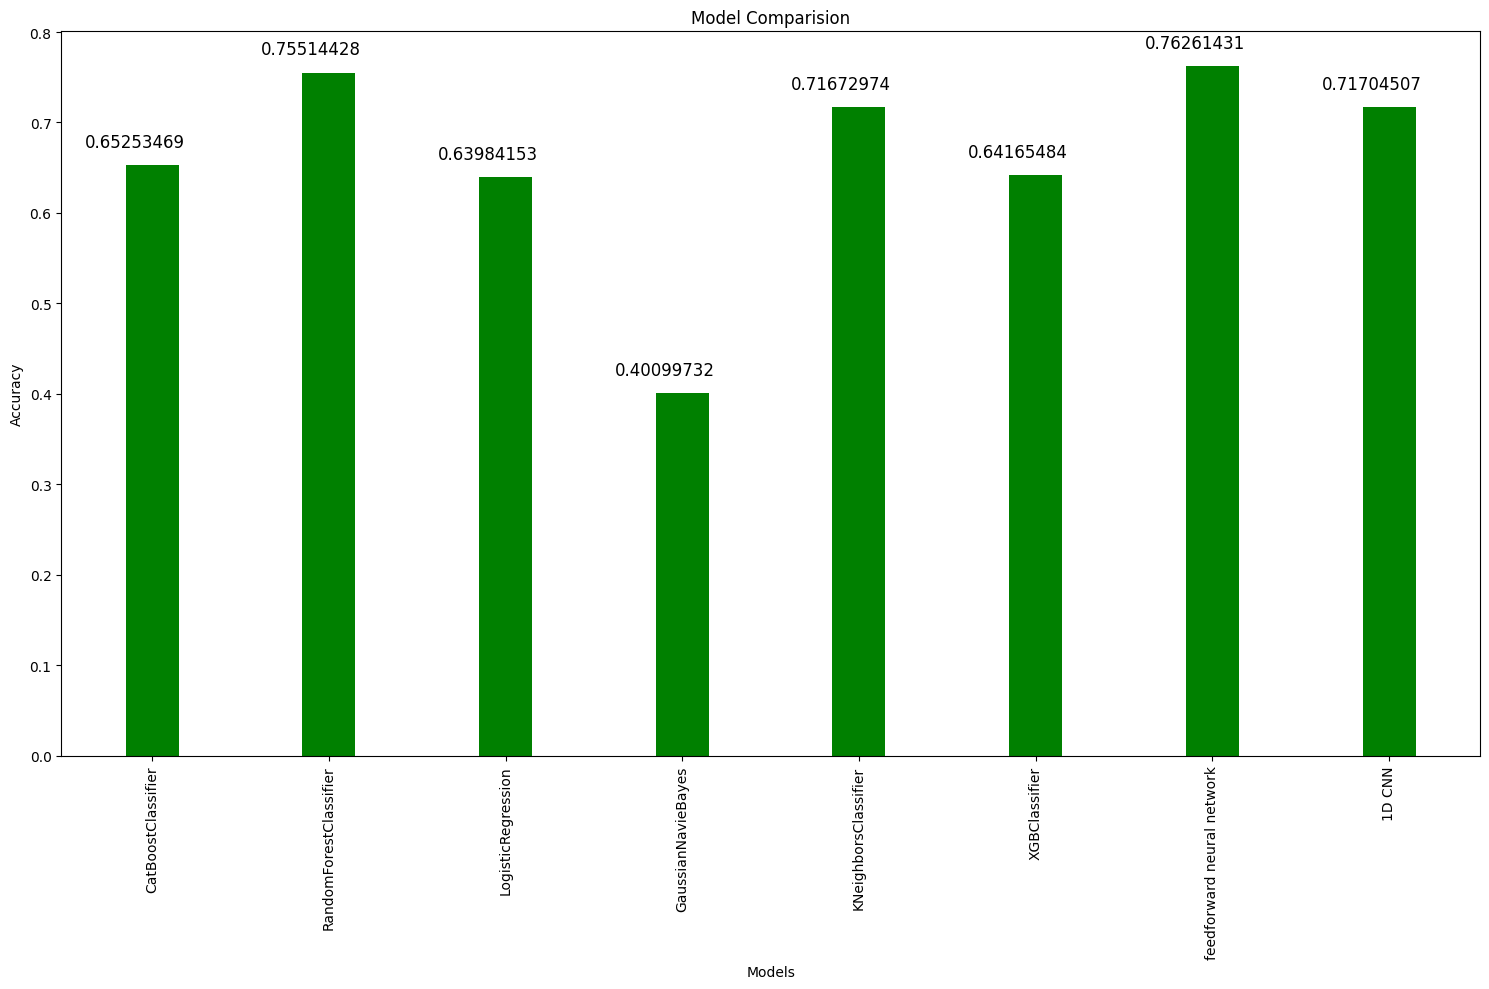

In [30]:
models=['CatBoostClassifier','RandomForestClassifier','LogisticRegression','GaussianNavieBayes','KNeighborsClassifier','XGBClassifier','feedforward neural network','1D CNN']
fig=plt.figure(figsize=(15,10))
bars=plt.bar(models,accuracylis,color='g',width=0.3)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparision')
plt.xticks(rotation=90)

# Add values above each bar
for bar, score in zip(bars,accuracylis):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{score:.8f}', ha='center', color='black', fontsize=12)

plt.tight_layout()  # Ensure labels are not cut off
plt.show()